<a href="https://colab.research.google.com/github/prashant10021999/Deep-learning-for-computer-vision/blob/main/HandDrawn_sketches_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import tensorflow as tf
from PIL import Image as im
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
"""Importing images of following classes"""

classes = ['cat','bicycle', 'bear','airplane',
                'ant','banana','bench','book',
                'bottlecap', 'bread']

In [ ]:
url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'

In [ ]:
# Download the data of the aforementioned classes
for class_ in classes:
	complete_url = url+class_+".npy"
	print("Downloading : ",complete_url)
	urllib.request.urlretrieve(complete_url, "./"+class_+".npy")

In [ ]:
# Grep all the downloaded files and add them to a list
data_sets = glob.glob(os.path.join('./*.npy'))

In [ ]:
"""Creating train and test datasets"""

#initialize variables
# Train data
input = np.empty([0, 784])
# Test data
labels = np.empty([0])
index = 0


In [ ]:
# Concatenate the train and test data from all the files
for file in data_sets:
	data = np.load(file)
	data = data[0: 6000, :]
	input = np.concatenate((input, data), axis=0)
	labels = np.append(labels, [index]*data.shape[0])
	index += 1

In [ ]:
# K-Folds cross-validator
n_fold = 5
kf = KFold(n_splits=n_fold, shuffle=True, random_state=9)
x_train, x_test, y_train, y_test = None, None, None, None
random_ordering = np.random.permutation(input.shape[0])
input = input[random_ordering, :]
labels = labels[random_ordering]

In [ ]:
# Divide the dataset into train and test
for train_index, test_index in kf.split(input):
    x_train, x_test = input[train_index], input[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    break

In [ ]:
len(x_train)

48000

In [ ]:
len(x_test)

12000

In [ ]:
x_train[:20]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_test[:20]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train[:20]

array([5., 9., 2., 1., 1., 9., 3., 5., 1., 0., 1., 3., 1., 7., 5., 6., 7.,
       6., 0., 8.])

In [ ]:
y_test[:20]

array([0., 0., 4., 8., 1., 2., 8., 5., 6., 7., 6., 5., 0., 8., 6., 0., 9.,
       9., 0., 8.])

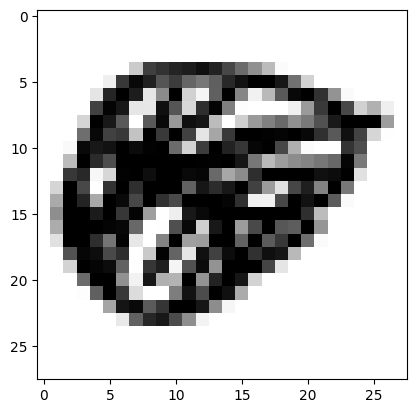

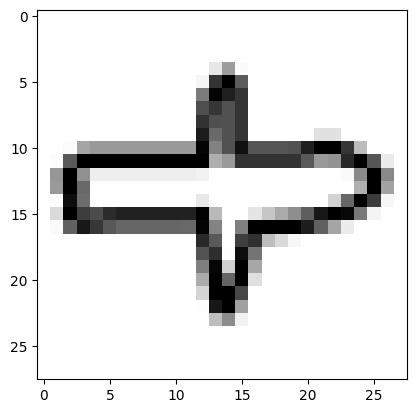

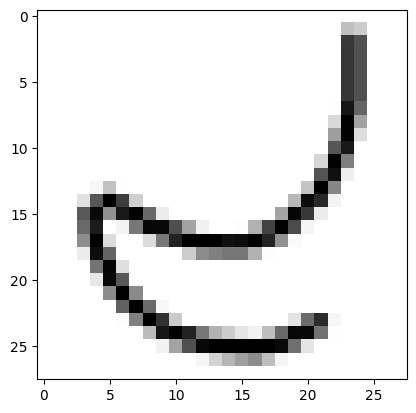

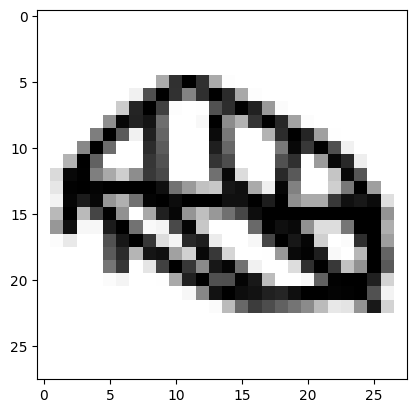

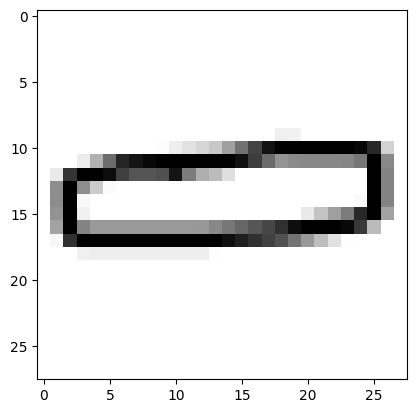

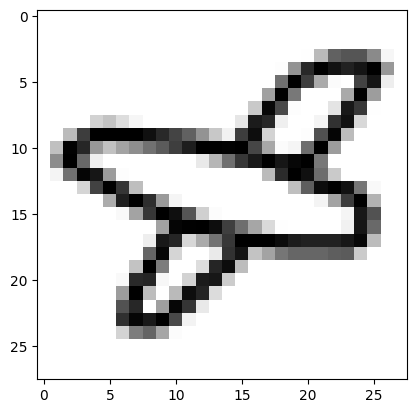

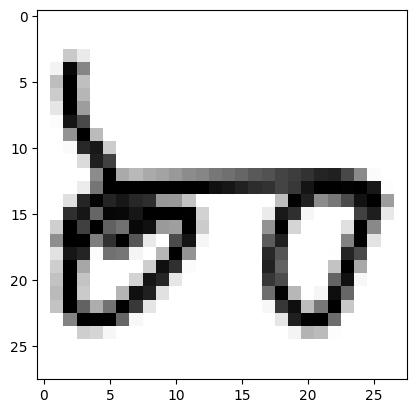

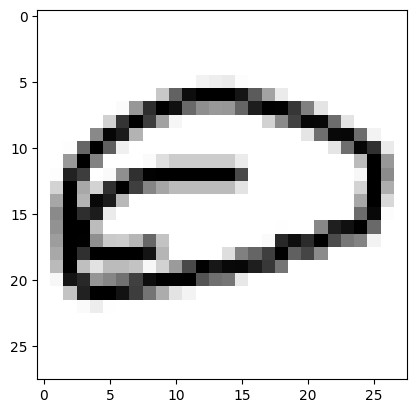

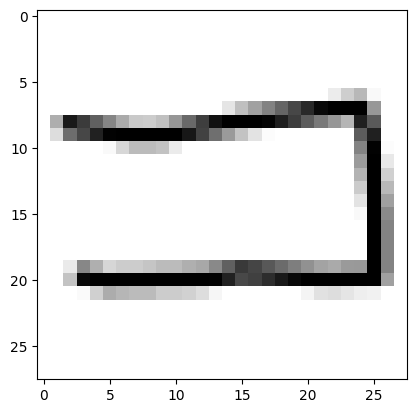

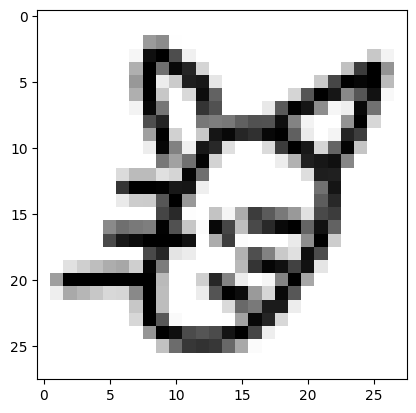

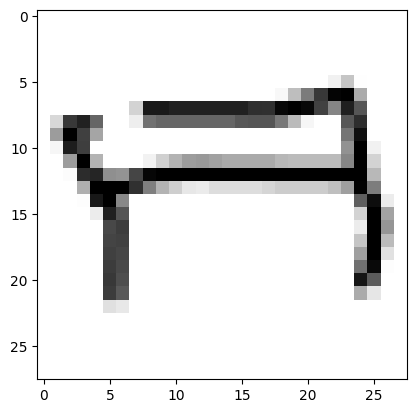

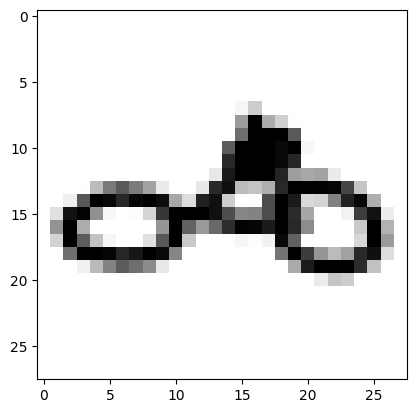

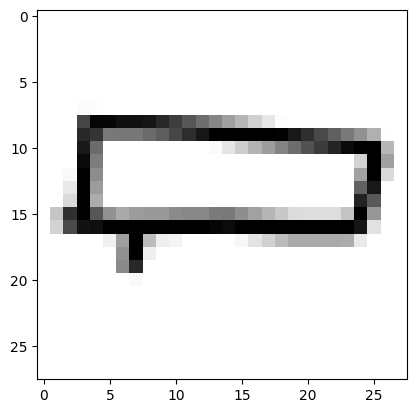

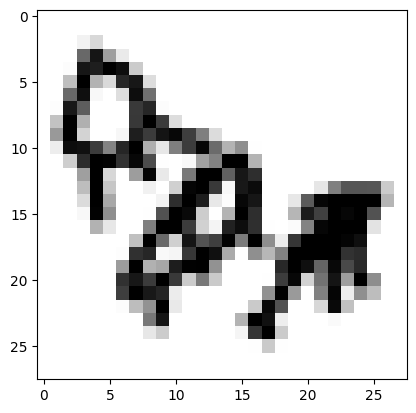

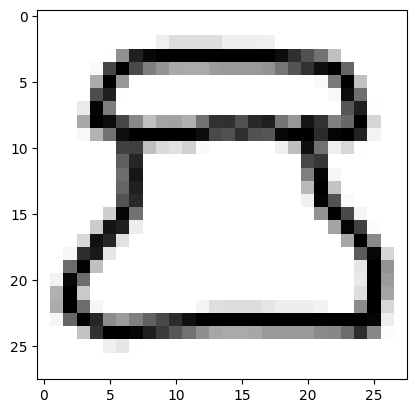

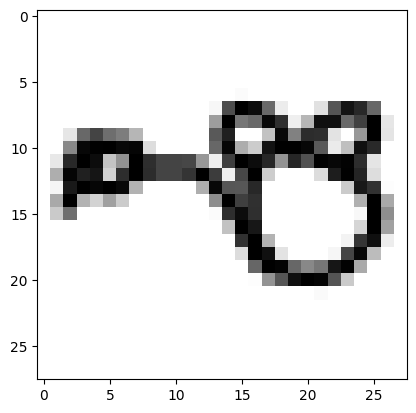

In [ ]:
"""Visualising the input images"""

import matplotlib.pyplot as plt
image_size = 28
x_train_ = x_train.reshape(x_train.shape[0], image_size, image_size)
for i in range(16):
  plt.grid(False)
  plt.imshow(x_train_[i], cmap=plt.cm.binary)
  plt.show()


In [ ]:
"""Normalisation"""

# Divide all the values by 255 to normalize the image
x_train /= 255.0
x_test /= 255.0

# Saving for feature selection and 1d classifiers
x_train_fea = x_train
x_test_fea = x_test
x_train_1d = x_train
x_test_1d = x_test

In [ ]:
"""Reshaping"""

# Reshape the image size to be 28 x 28
image_size = 28
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1)
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1)

num_classes = len(classes)

In [ ]:
"""# Random Forest"""

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble._forest import RandomForestClassifier
parameters = {'n_estimators': [100,120,140,160]}

clf_rf = RandomForestClassifier(n_estimators = 150, n_jobs=-1, random_state=0)
# model = GridSearchCV(clf_rf, parameters, n_jobs=-1)
clf_rf.fit(x_train_1d, y_train)


RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=0)

In [ ]:
"""Predicting"""

y_pred = clf_rf.predict(x_test_1d)
y_pred[:10]

"""Checkng Test Accuracy"""

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.7726666666666666


In [ ]:
"""# KNN"""

from sklearn.neighbors import KNeighborsClassifier

tuning_parameters = {'n_neighbors': [1,3,5,7,9,11]}

knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)
# knn = GridSearchCV(clf_knn, tuning_parameters, n_jobs=-1)
knn.fit(x_train_1d, y_train)


KNeighborsClassifier(n_jobs=-1)

In [ ]:
"""Predicting"""

y_pred = knn.predict(x_test_1d)
y_pred[:10]


array([0., 0., 4., 8., 1., 2., 8., 6., 6., 9.])

In [ ]:
"""Testing Accuracy"""

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7340833333333333


In [ ]:
"""# MLP"""

from sklearn.neural_network import MLPClassifier

tuning_parameaters = {'hidden_layer_sizes' : [(50,), (100,), (784,), (50,50), (100,100), (784,784), (50,50,50), (100,100,100)],
                    'alpha' : list(10.0 ** -np.arange(1, 7))}

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), random_state=0)
# mlp = GridSearchCV(clf_mlp, param_grid=tuning_parameaters, n_jobs=-1)
mlp.fit(x_train_1d, y_train)


MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=0)

In [ ]:
"""Predicting"""

y_pred = mlp.predict(x_test_1d)
y_pred[:10]

array([0., 6., 4., 8., 1., 2., 8., 6., 6., 9.])

In [ ]:
"""Testing Accuracy"""

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7639166666666667


In [ ]:
"""# CNN"""

# CNN Model
model = keras.Sequential()
model.add(layers.Convolution2D(64, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Convolution2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size =(3,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
optimizer = tf.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [ ]:
"""Fitting model"""

# Fit a model to the train data
model.fit(x = x_train, y = y_train, batch_size = 100,  validation_split = 0.2, epochs=5)

"""Predicting"""

y_predict = model.predict(x_test)
y_predict[:2]


Epoch 1/5
384/384 [==============================] - 66s 166ms/step - loss: 0.9544 - accuracy: 0.6879 - val_loss: 0.5856 - val_accuracy: 0.8140
Epoch 2/5
384/384 [==============================] - 64s 166ms/step - loss: 0.5269 - accuracy: 0.8371 - val_loss: 0.4454 - val_accuracy: 0.8636
Epoch 3/5
384/384 [==============================] - 64s 168ms/step - loss: 0.4278 - accuracy: 0.8682 - val_loss: 0.4019 - val_accuracy: 0.8747
Epoch 4/5
384/384 [==============================] - 64s 166ms/step - loss: 0.3768 - accuracy: 0.8833 - val_loss: 0.3695 - val_accuracy: 0.8850
Epoch 5/5
375/375 [==============================] - 6s 16ms/step


array([[9.51458871e-01, 1.56529510e-04, 7.88501202e-05, 6.44817576e-03,
        2.83133159e-05, 8.15284345e-03, 3.26532461e-02, 1.44738093e-04,
        2.78677529e-04, 5.99771738e-04],
       [8.18778694e-01, 3.38299360e-05, 1.23129983e-03, 6.57991186e-05,
        1.17568285e-04, 1.39497872e-03, 1.77718431e-01, 1.49032829e-04,
        1.20955250e-04, 3.89285706e-04]], dtype=float32)

In [ ]:
"""Testing Accuracy"""

# Obtain the accuracy of the above model on the test data
accuracy = model.evaluate(x_test, y_test)


375/375 [==============================] - 10s 27ms/step - loss: 0.3811 - accuracy: 0.8853


In [ ]:
"""# Feature Selection"""

# Taking old data inputs
x_train = x_train_fea
x_test = x_test_fea

x_train_1d = x_train_fea
x_test_1d = x_test_fea

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
n_features = 400
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(x_train_1d, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(range(len(x_train_1d)))
#concat two dataframes for better visualization

featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(n_features,'Score'))  #print 1 best features


     Specs        Score
529    529  5415.799172
501    501  5023.740567
506    506  4874.034338
557    557  4723.490764
534    534  4387.790709
..     ...          ...
234    234  1445.973321
467    467  1441.493130
451    451  1438.467030
242    242  1436.813068
211    211  1436.228381

[400 rows x 2 columns]


In [ ]:
fit.scores_[100:120]

array([2805.97291845, 2768.84483518, 2676.63875135, 2579.82677828,
       2590.82636719, 2706.28315379, 2492.16179049, 2128.23398009,
       1537.79828535,  823.86195215,  154.95802775,           nan,
                 nan,  206.69007357, 1151.02682676, 1983.8278704 ,
       2627.7761421 , 2859.57428992, 2806.14402797, 2618.89758628])

In [ ]:
featureScores.nlargest(n_features,'Score')

,Specs,Score
529,529,5415.799172
501,501,5023.740567
506,506,4874.034338
557,557,4723.490764
534,534,4387.790709
...,...,...
234,234,1445.973321
467,467,1441.493130
451,451,1438.467030
242,242,1436.813068


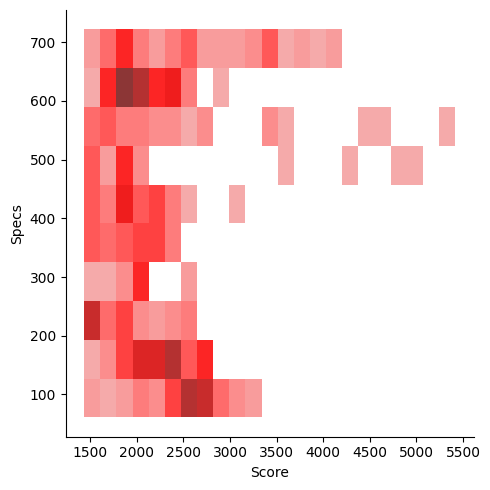

In [ ]:
sns.displot(data=featureScores.nlargest(n_features,'Score'), x="Score", y="Specs", color="Red")

In [ ]:
train_x_new = []
for x_tr in x_train_1d:
  temp = []
  for i in featureScores.nlargest(n_features, 'Score')['Specs']:
      temp.append(x_tr[i])
  train_x_new.append(temp)

train_x_new[0][115:120]

test_x_new = []
for x_te in x_test_1d:
  temp = []
  for i in featureScores.nlargest(n_features, 'Score')['Specs']:
      temp.append(x_te[i])
  test_x_new.append(temp)

test_x_new[0][:10]

len(train_x_new)

len(test_x_new)

12000

In [ ]:
len(test_x_new)

12000

In [ ]:
len(train_x_new)

48000

In [ ]:
"""# Updating the dataset with new features"""

x_train = np.array(train_x_new)
x_test = np.array(test_x_new)

x_train_1d = x_train
x_test_1d = x_test

# Reshape the image size to be 20 x 20
image_size = 20
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1)
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1)


In [ ]:
"""# Random Forest"""

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble._forest import RandomForestClassifier
parameters = {'n_estimators': [100,120,140,160]}

clf_rf_fe = RandomForestClassifier(n_estimators = 280, n_jobs=-1, random_state=0)
# clf_rf = GridSearchCV(clf_rf, parameters, n_jobs=-1)
clf_rf_fe.fit(x_train_1d, y_train)

y_pred = clf_rf_fe.predict(x_test_1d)
y_pred[:10]

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.75675


In [ ]:
"""# MLP"""

from sklearn.neural_network import MLPClassifier

tuning_parameaters = {'hidden_layer_sizes' : [(50,), (100,), (784,), (50,50), (100,100), (784,784), (50,50,50), (100,100,100)],
                    'alpha' : list(10.0 ** -np.arange(1, 7))}

mlp_fe = MLPClassifier(hidden_layer_sizes=(784,784), random_state=0)
# mlp = GridSearchCV(clf_mlp, param_grid=tuning_parameaters, n_jobs=-1)
mlp_fe.fit(x_train_1d, y_train)

y_pred = mlp_fe.predict(x_test_1d)
y_pred[:10]

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7851666666666667


In [ ]:
# Reshaping
image_size = 28
x_train = x_train_fea.reshape(x_train.shape[0], image_size, image_size, 1)
x_test = x_test_fea.reshape(x_test.shape[0], image_size, image_size, 1)

In [ ]:
# CNN Model
model_fe = keras.Sequential()
model_fe.add(layers.Convolution2D(64, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model_fe.add(layers.MaxPooling2D(pool_size=(3, 3)))
model_fe.add(layers.Convolution2D(128, (3, 3), padding='same', activation='relu'))
model_fe.add(layers.MaxPooling2D(pool_size=(3, 3)))
model_fe.add(layers.Convolution2D(64, (3, 3), padding='same', activation='relu'))
model_fe.add(layers.MaxPooling2D(pool_size =(3,3)))
model_fe.add(layers.Flatten())
model_fe.add(layers.Dense(128, activation='relu'))
model_fe.add(layers.Dense(len(classes), activation='softmax'))
optimizer = tf.optimizers.Adam()
model_fe.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [ ]:
# Fit a model to the train data
model_fe.fit(x = x_train, y = y_train, batch_size = 100,  validation_split = 0.2, epochs=15)

y_pred = model_fe.predict(x_test)
y_pred[:2]


Epoch 1/15
384/384 [==============================] - 68s 173ms/step - loss: 0.9388 - accuracy: 0.6936 - val_loss: 0.6060 - val_accuracy: 0.8035
Epoch 2/15
384/384 [==============================] - 63s 165ms/step - loss: 0.5113 - accuracy: 0.8393 - val_loss: 0.4394 - val_accuracy: 0.8611
Epoch 3/15
384/384 [==============================] - 61s 160ms/step - loss: 0.4057 - accuracy: 0.8748 - val_loss: 0.3889 - val_accuracy: 0.8776
Epoch 4/15
384/384 [==============================] - 62s 162ms/step - loss: 0.3466 - accuracy: 0.8915 - val_loss: 0.3575 - val_accuracy: 0.8874
Epoch 5/15
384/384 [==============================] - 60s 156ms/step - loss: 0.3036 - accuracy: 0.9045 - val_loss: 0.3391 - val_accuracy: 0.8932
Epoch 6/15
384/384 [==============================] - 62s 162ms/step - loss: 0.2771 - accuracy: 0.9118 - val_loss: 0.3220 - val_accuracy: 0.8991
Epoch 7/15
384/384 [==============================] - 60s 157ms/step - loss: 0.2415 - accuracy: 0.9236 - val_loss: 0.3117 - val_ac

array([[9.99980748e-01, 1.17264207e-08, 8.15912848e-09, 3.49367696e-07,
        1.99615269e-10, 2.17584528e-07, 1.86303150e-05, 4.48772397e-09,
        1.16152414e-10, 2.37092079e-09],
       [9.74495232e-01, 6.08386927e-07, 1.35206059e-03, 4.08447733e-07,
        4.75673412e-09, 1.36307494e-06, 2.41481829e-02, 1.77944196e-06,
        3.65263503e-07, 4.17758095e-08]], dtype=float32)

375/375 [==============================] - 8s 20ms/step - loss: 0.4563 - accuracy: 0.8907


<ipython-input-49-f2e449b5b847>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df, ci="sd")


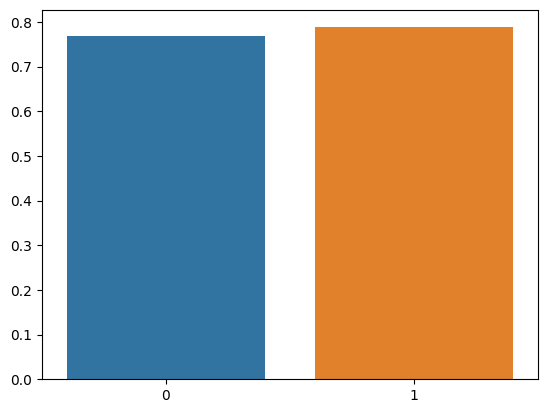

In [ ]:
# Obtain the accuracy of the above model on the test data
accuracy = model_fe.evaluate(x_test, y_test)

df = pd.DataFrame([[0.769, 0.788]])
ax = sns.barplot(data=df, ci="sd")

<ipython-input-50-ad8cb660bc59>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df, ci="sd")


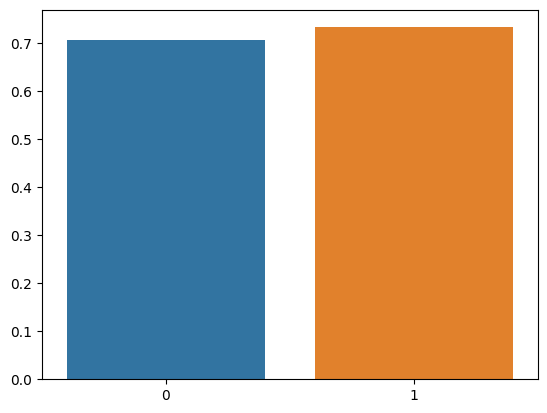

In [ ]:
df = pd.DataFrame([[0.707, 0.73375]])
ax = sns.barplot(data=df, ci="sd")

<ipython-input-51-74be3d5523d0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df, ci="sd")


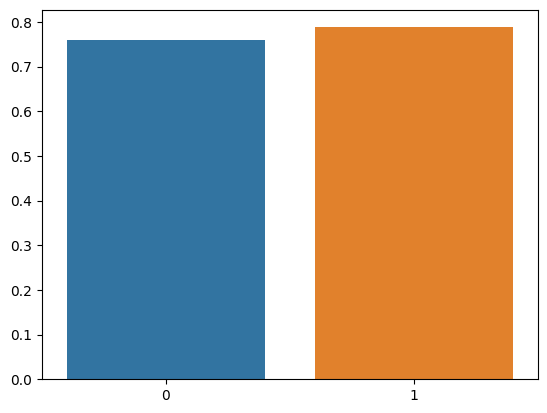

In [ ]:
df = pd.DataFrame([[0.759, 0.788]])
ax = sns.barplot(data=df, ci="sd")

<ipython-input-52-e62977151ae2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df, ci="sd")


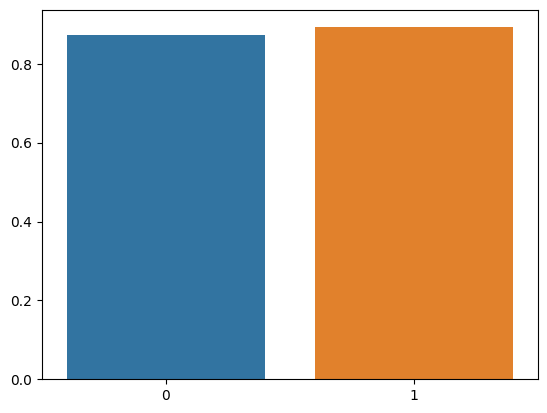

In [ ]:
df = pd.DataFrame([[0.8717, 0.8924]])
ax = sns.barplot(data=df, ci="sd")